(Get everything into one nice path and make it work) 

In [179]:
import pandas as pd
import xarray as xr
import numpy as np
import cartopy as ccrs
from matplotlib import pyplot as plt
from netCDF4 import Dataset
%matplotlib inline

In [276]:
precipforcasturl = "http://iridl.ldeo.columbia.edu/SOURCES/.Models/.SubX/.ESRL/.FIMr1p1/.hindcast/.pr/L/2.5/31.5/RANGEEDGES/%5BL%5D/average/X/-130.25/-99.75/RANGE/Y/24.75/50.25/RANGE/dods "
rainforcast=xr.open_dataset(precipforcasturl, chunks={'S': 100})
sstforecasturl="http://iridl.ldeo.columbia.edu/SOURCES/.Models/.SubX/.ESRL/.FIMr1p1/.hindcast/.ts/L/2.5/31.5/RANGEEDGES/%5BL%5Daverage/Y/-5/5/RANGEEDGES/X/190/240/RANGEEDGES/dods "
sstforcast=xr.open_dataset(sstforecasturl, chunks={'S': 100})
windforcasturl="http://iridl.ldeo.columbia.edu/SOURCES/.Models/.SubX/.ESRL/.FIMr1p1/.hindcast/.ua/L/2.5/31.5/RANGEEDGES/%5BL%5D/average/X/220/240/RANGE/Y/27/40/RANGE/[X/Y]average/dods"
windforcast=xr.open_dataset(windforcasturl,chunks={"S":100})


In [261]:
windforcast

<xarray.Dataset>
Dimensions:  (M: 4, P: 6, S: 965)
Coordinates:
  * P        (P) int32 850 200 100 50 30 10
  * S        (S) datetime64[ns] 1999-01-06 1999-01-13 ... 2017-06-21 2017-06-28
  * M        (M) float32 1.0 2.0 3.0 4.0
Data variables:
    ua       (P, S, M) float64 dask.array<shape=(6, 965, 4), chunksize=(6, 100, 4)>
Attributes:
    Conventions:  IRIDL

In [277]:
sstforcast=sstforcast.mean(["X","Y"])

In [263]:
windforcast.ua

<xarray.DataArray 'ua' (P: 6, S: 965, M: 4)>
dask.array<shape=(6, 965, 4), dtype=float64, chunksize=(6, 100, 4)>
Coordinates:
  * P        (P) int32 850 200 100 50 30 10
  * S        (S) datetime64[ns] 1999-01-06 1999-01-13 ... 2017-06-21 2017-06-28
  * M        (M) float32 1.0 2.0 3.0 4.0
Attributes:
    long_name:           Zonal Velocity
    level_type:          pressure level
    cell_method:         time: point
    vartyp:              vector
    units:               m s-1
    standard_name:       eastward_wind
    cell_methods:        time: mean pressure: mean
    file_missing_value:  -999999.0
    history:             Averaged over L[2.0 days, 32.0 days] minimum 0.0% da...

In [264]:

td = np.timedelta64(15,'D')
ua=np.array(windforcast.ua)
T=np.array(windforcast.coords["S"])+td
M=np.array(windforcast.coords["M"])
np.shape(ua)

(6, 965, 4)

In [265]:
windforcast

<xarray.Dataset>
Dimensions:  (M: 4, P: 6, S: 965)
Coordinates:
  * P        (P) int32 850 200 100 50 30 10
  * S        (S) datetime64[ns] 1999-01-06 1999-01-13 ... 2017-06-21 2017-06-28
  * M        (M) float32 1.0 2.0 3.0 4.0
Data variables:
    ua       (P, S, M) float64 dask.array<shape=(6, 965, 4), chunksize=(6, 100, 4)>
Attributes:
    Conventions:  IRIDL

In [266]:
pr=np.array(rainforcast.pr)
T=np.array(rainforcast.coords["S"])+td
M=np.array(rainforcast.coords["M"])
np.shape(pr)

(965, 4, 28, 33)

In [267]:
pforcast_adjtime= xr.Dataset(data_vars={'pr':    (('T', 'M','Y','X'), pr)},coords={'T': T,'M': M,'Y':rainforcast.coords["Y"],'X':rainforcast.coords["X"]},)
pforcast_adjtime

<xarray.Dataset>
Dimensions:  (M: 4, T: 965, X: 33, Y: 28)
Coordinates:
  * T        (T) datetime64[ns] 1999-01-21 1999-01-28 ... 2017-07-06 2017-07-13
  * M        (M) float32 1.0 2.0 3.0 4.0
  * Y        (Y) float32 24.0 25.0 26.0 27.0 28.0 ... 47.0 48.0 49.0 50.0 51.0
  * X        (X) float32 -131.0 -130.0 -129.0 -128.0 ... -101.0 -100.0 -99.0
Data variables:
    pr       (T, M, Y, X) float64 1.658e-06 1.343e-06 ... 1.335e-05 1.775e-05

Adjust S coordinate: Add 15 days to each time coordinate:
S.dayofyear.values+15

In [278]:
wforcast_adjtime= xr.Dataset(data_vars={'ua':  (('P','T', 'M'), ua)},coords={'P':windforcast.coords["P"],'T': T,'M': M},)
wforcast_adjtime
sstforcast.ts

<xarray.DataArray 'ts' (S: 965, M: 4)>
dask.array<shape=(965, 4), dtype=float64, chunksize=(100, 4)>
Coordinates:
  * S        (S) datetime64[ns] 1999-01-06 1999-01-13 ... 2017-06-21 2017-06-28
  * M        (M) float32 1.0 2.0 3.0 4.0

In [279]:

ts=np.array(sstforcast.ts)
T=np.array(windforcast.coords["S"])+td
M=np.array(windforcast.coords["M"])

In [280]:
sstforcast.ts

sstforcast_adjtime= xr.Dataset(data_vars={'ts':  (('T', 'M'), ts)},coords={'T': T,'M': M},)
sstforcast_adjtime

<xarray.Dataset>
Dimensions:  (M: 4, T: 965)
Coordinates:
  * T        (T) datetime64[ns] 1999-01-21 1999-01-28 ... 2017-07-06 2017-07-13
  * M        (M) float32 1.0 2.0 3.0 4.0
Data variables:
    ts       (T, M) float64 298.0 298.1 298.1 298.1 ... 300.8 300.8 300.7 300.8

In [44]:
import datetime
datetime.timedelta(days=15)

datetime.timedelta(days=15)

In [34]:
np.array(windforcast.coords["S"])[1]+datetime.timedelta(days=15)
td = np.timedelta64(15,'d')

TypeError: ufunc add cannot use operands with types dtype('<M8[ns]') and dtype('O')

In [36]:
td = np.timedelta64(15,'D')

In [ ]:
T=np.array(windforcast.coords["S"])+td
ua=np.array(windforcast.ua)
windforcast


In [60]:
rainforcast["T"]=np.array(windforcast.coords["S"])+td

In [61]:
sstforcast["T"]=np.array(windforcast.coords["S"])+td

In [315]:
rainanom=pforcast_adjtime.groupby('T.month') - pforcast_adjtime.groupby('T.month').mean('T')

In [354]:
windanom=wforcast_adjtime.groupby('T.month') - wforcast_adjtime.groupby('T.month').mean('T')
windanom=windanom.mean("P")
data1=rainanom.sel(T=rainanom["T.month"]==10).mean("M")
data1
data2=windanom.sel(T=windanom["T.month"]==10).mean("M")
cov=(data2.ua*data1.pr).mean("T")
s1=data1.pr.std("T")
s2=data2.ua.std("T")
plot=cov/s1/s2
plot

<xarray.DataArray (Y: 28, X: 33)>
array([[ 0.068337,  0.027878, -0.051408, ..., -0.274265, -0.237968, -0.176728],
       [ 0.123468,  0.104031,  0.012552, ..., -0.25159 , -0.136352, -0.075141],
       [ 0.086924,  0.080657,  0.004505, ..., -0.241266, -0.087509, -0.061635],
       ...,
       [ 0.372817,  0.379649,  0.416124, ..., -0.034635, -0.017711, -0.021133],
       [ 0.313801,  0.318199,  0.312917, ..., -0.060268, -0.050065, -0.036324],
       [ 0.275698,  0.260637,  0.2621  , ..., -0.059889, -0.044165, -0.044464]])
Coordinates:
  * Y        (Y) float32 24.0 25.0 26.0 27.0 28.0 ... 47.0 48.0 49.0 50.0 51.0
  * X        (X) float32 -131.0 -130.0 -129.0 -128.0 ... -101.0 -100.0 -99.0

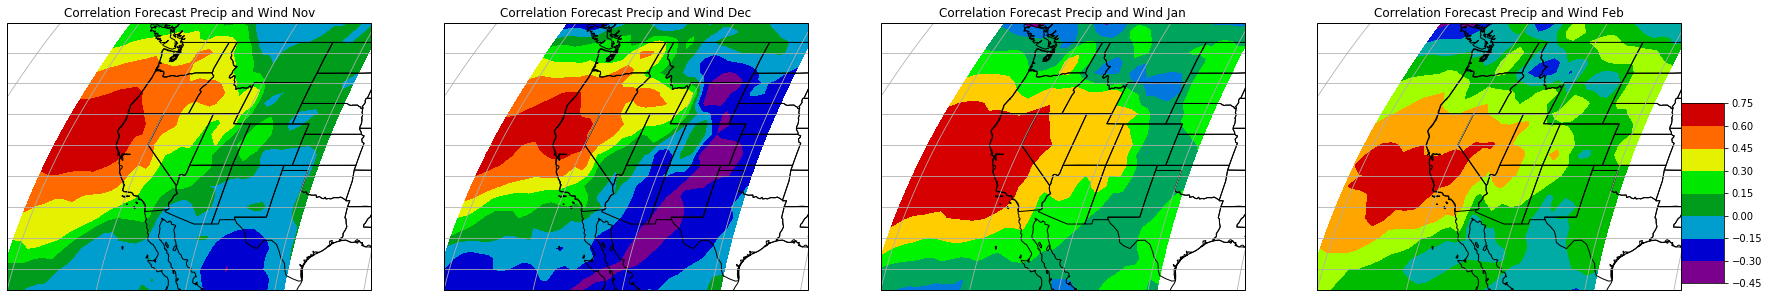

In [287]:
month=["Nov","Dec","Jan","Feb"]
monthnum=[10,11,1,2]
fig, (ax1, ax2,ax3,ax4) = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(30,5))
for i,j in enumerate([ax1,ax2,ax3,ax4]):
    data1=rainanom.sel(T=rainanom["T.month"]==monthnum[i])
    data2=windanom.sel(T=windanom["T.month"]==monthnum[i])
    cov=(data2.ua*data1.pr).mean(["T","M"])
    s1=data1.pr.std(["T","M"])
    s2=data2.ua.std(["T","M"])
    plot=cov/s1/s2
    plotmap(plot,"Correlation Forecast Precip and Wind "+month[i],resolution="one",ax=j,colorbar="nonauto")
cbar=fig.add_axes([.9, 0.15, 0.02, 0.5])
fig.colorbar(cb,cax=cbar)







Anomaly per month:

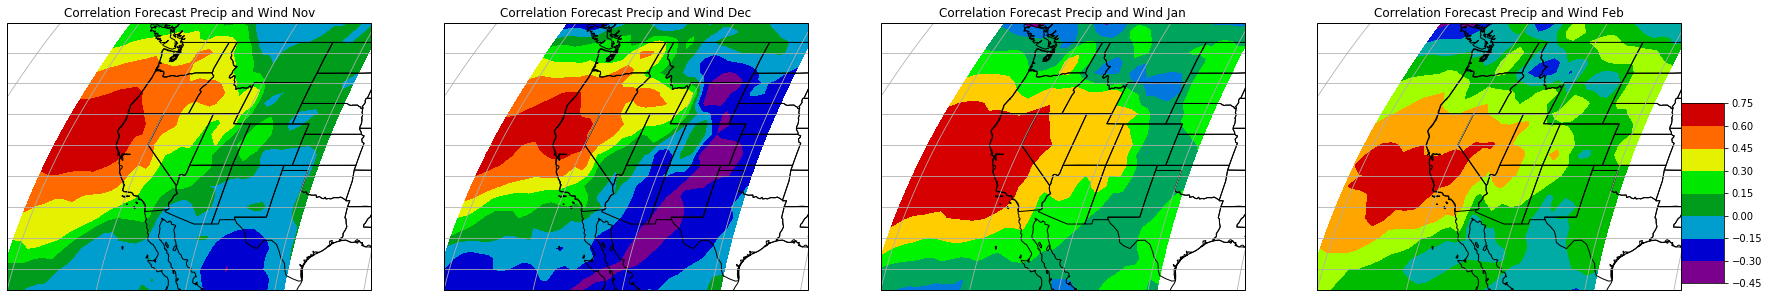

In [288]:
month=["Nov","Dec","Jan","Feb"]
monthnum=[10,11,1,2]
fig, (ax1, ax2,ax3,ax4) = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(30,5))
for i,j in enumerate([ax1,ax2,ax3,ax4]):
    pmonth=pforcast_adjtime.sel(T=pforcast_adjtime["T.month"]==monthnum[i])
    rainanom=pmonth - pmonth.mean('T')
    wmonth=wforcast_adjtime.sel(T=wforcast_adjtime["T.month"]==monthnum[i])
    windanom=wmonth-wmonth.mean("T")
    windanom=windanom.mean("P")
    data1=rainanom
    data2=windanom
    cov=(data2.ua*data1.pr).mean(["T","M"])
    s1=data1.pr.std(["T","M"])
    s2=data2.ua.std(["T","M"])
    plot=cov/s1/s2
    plotmap(plot,"Correlation Forecast Precip and Wind "+month[i],resolution="one",ax=j,colorbar="nonauto")
cbar=fig.add_axes([.9, 0.15, 0.02, 0.5])
fig.colorbar(cb,cax=cbar)



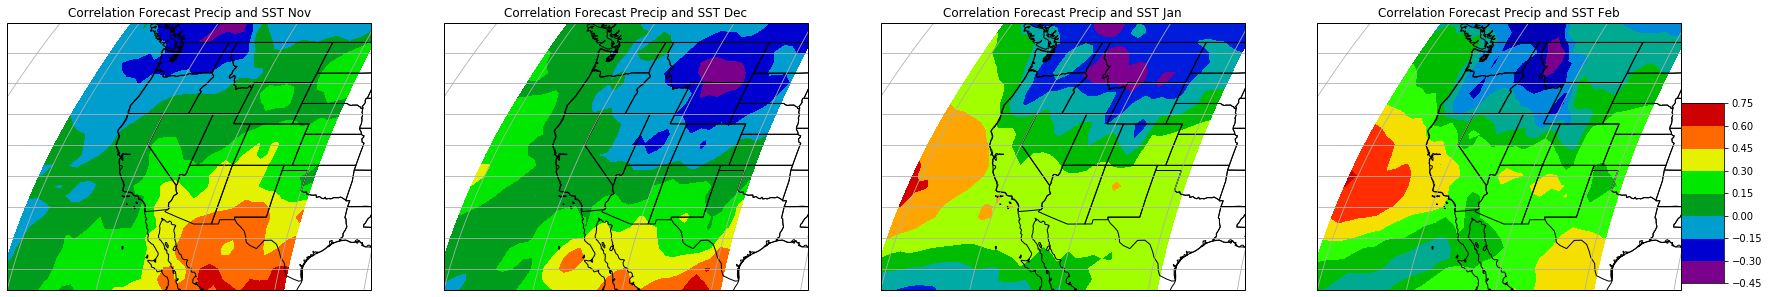

In [289]:
month=["Nov","Dec","Jan","Feb"]
monthnum=[10,11,1,2]
fig, (ax1, ax2,ax3,ax4) = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(30,5))
for i,j in enumerate([ax1,ax2,ax3,ax4]):
    pmonth=pforcast_adjtime.sel(T=pforcast_adjtime["T.month"]==monthnum[i])
    rainanom=pmonth - pmonth.mean('T')
    sstmonth=sstforcast_adjtime.sel(T=wforcast_adjtime["T.month"]==monthnum[i])
    data1=rainanom
    data2=sstmonth
    cov=(data2.ts*data1.pr).mean(["T","M"])
    s1=data1.pr.std(["T","M"])
    s2=data2.ts.std(["T","M"])
    plot=cov/s1/s2
    plotmap(plot,"Correlation Forecast Precip and SST "+month[i],resolution="one",ax=j,colorbar="nonauto")
cbar=fig.add_axes([.9, 0.15, 0.02, 0.5])
fig.colorbar(cb,cax=cbar)


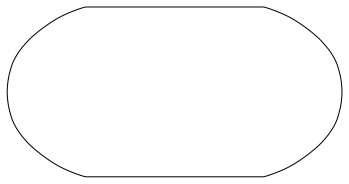

In [143]:
import cartopy.feature as cfeature
def plotmap(data,title,resolution="one",ax=plt.axes(projection=ccrs.crs.Robinson()),colorbar="auto"):
    central_lon, central_lat = -115, 40
    extent = [-130,-100,25, 50]
    ax.set_title(title)
    ax.set_extent(extent)
    ax.gridlines()
    ax.coastlines(resolution='50m')
    ax.add_feature(cfeature.STATES)
    lons, lats = getlonlat(resolution)
    cb=ax.contourf(lons, lats, data,transform=ccrs.crs.PlateCarree(),cmap='nipy_spectral')
    if colorbar=="auto":
        plt.colorbar(cb, cmap='nipy_spectral', orientation='vertical',ticklocation='auto')
    else:
        return cb
def getlonlat(resolution):
    if resolution=="half":
        lats = np.linspace(24.75,50.25, 52)
        lons= np.linspace(-130.25,-99.75,62)
    else:
        lats = np.linspace(24,51, 28)
        lons= np.linspace(-131,-99,33)
    return lons, lats

In [359]:
#A linear algebra regression function 
def regress(a,b):
    A=np.matmul(np.transpose(a),a)
    B=np.matmul(np.transpose(a),b)
    return np.linalg.solve(A,B)
    

    
#tshape is a multiplication of other variables (4 M variables* t, the resulting matrices will be 4t long)
#dependent is the b matrix 
#indenepent is one of the a matrices
#precipiation is our constant a matrix 
# this function computes two coefficients for ax=b and correlates their respectives squared errors 
def partialcorr(dependent,independent,precip,month,shape,tshape):
    error1=np.empty((shape[0],shape[1],tshape*4))
    a2=independent
    b=np.empty((tshape*4))
    for k,m in enumerate([1.0,2.0,3.0,4.0]):
            b[k*tshape:(k+1)*tshape]=np.array(dependent.sel(M=m))
    if shape==(52,62):
        x,y=getlonlat("half")
    else:
         x,y=getlonlat("one")
    for i in range(shape[1]):
        for j in range(shape[0]):
            a_array1=np.ones((tshape*4,2))
            for k,m in enumerate([1.0,2.0,3.0,4.0]):
                    a_array1[k*tshape:(k+1)*tshape,0]=np.array(precip.sel(Y=y[j],X=x[i],M=m))
            x1=regress(a_array1,b)
            error1[j,i,:]=np.square(b-np.matmul(a_array1,x1))
    a_array2=np.ones((tshape*4,2))
    for k,m in enumerate([1.0,2.0,3.0,4.0]):
        a_array2[k*tshape:(k+1)*tshape,0]=np.array(a2.sel(M=m))
    x2=regress(a_array2,b)
    error2=np.square(b-np.matmul(a_array2,x2))
    pc=np.empty(shape)
    for i in range(shape[1]):
        for j in range(shape[0]):
            pc[j,i]=np.corrcoef(error1[j,i,:],error2)[0,1]
    return pc
        


In [360]:
prep=rainanom.pr.sel(T=rainanom["T.month"]==10)
ind=windanom.ua.sel(T=windanom["T.month"]==10)
dep=sstforcast_adjtime.ts.sel(T=sstforcast_adjtime["T.month"]==10)
windanom

<xarray.Dataset>
Dimensions:  (M: 4, T: 965)
Coordinates:
  * M        (M) float32 1.0 2.0 3.0 4.0
  * T        (T) datetime64[ns] 1999-01-21 1999-01-28 ... 2017-07-06 2017-07-13
    month    (T) int64 1 1 2 2 2 2 3 3 3 3 4 4 4 4 ... 4 4 5 5 5 5 6 6 6 6 6 7 7
Data variables:
    ua       (T, M) float64 3.264 3.902 1.77 4.288 ... 0.4261 -0.1373 -0.1031

In [364]:
pc_10_wind_ind=partialcorr(ind,dep,prep,1,(28,33),79)

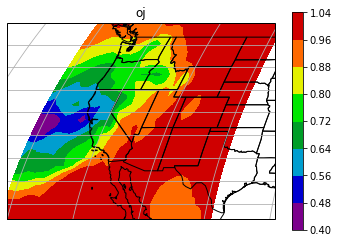

In [365]:
plotmap(pc_10_wind_ind,"oj",resolution="one",ax=plt.axes(projection=ccrs.crs.Robinson()),colorbar="auto")

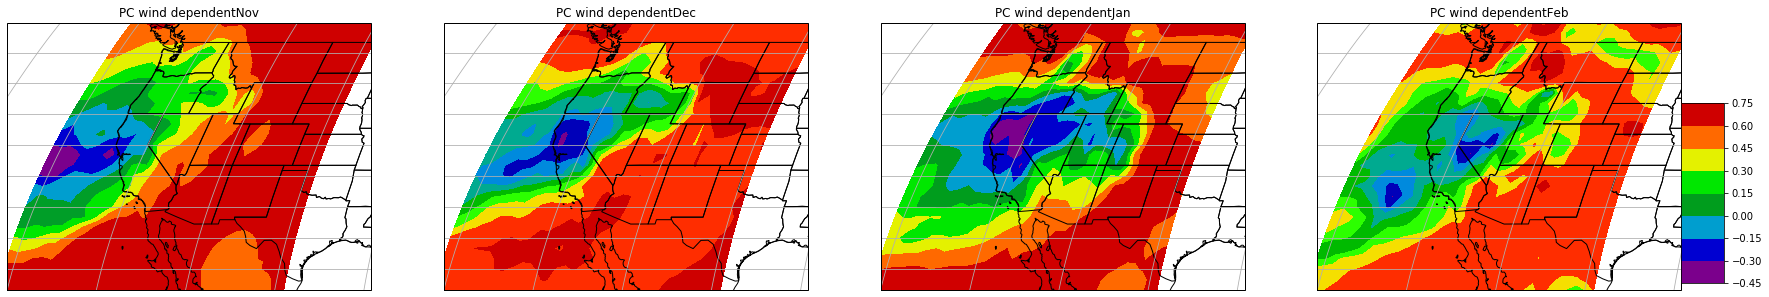

In [371]:
month=["Nov","Dec","Jan","Feb"]
monthnum=[10,11,1,2]
fig, (ax1, ax2,ax3,ax4) = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(30,5))
for i,j in enumerate([ax1,ax2,ax3,ax4]):
    pmonth=pforcast_adjtime.sel(T=pforcast_adjtime["T.month"]==monthnum[i])
    rainanom=pmonth - pmonth.mean('T')
    wmonth=wforcast_adjtime.sel(T=wforcast_adjtime["T.month"]==monthnum[i])
    sstmonth=sstforcast_adjtime.sel(T=wforcast_adjtime["T.month"]==monthnum[i])
    windanom=wmonth-wmonth.mean("T")
    windanom=windanom.mean("P")
    plot=partialcorr(windanom.ua,sstmonth.ts,rainanom.pr,1,(28,33),np.shape(windanom.ua)[0])
    plotmap(plot,"PC wind dependent"+month[i],resolution="one",ax=j,colorbar="nonauto")
cbar=fig.add_axes([.9, 0.15, 0.02, 0.5])
fig.colorbar(cb,cax=cbar)


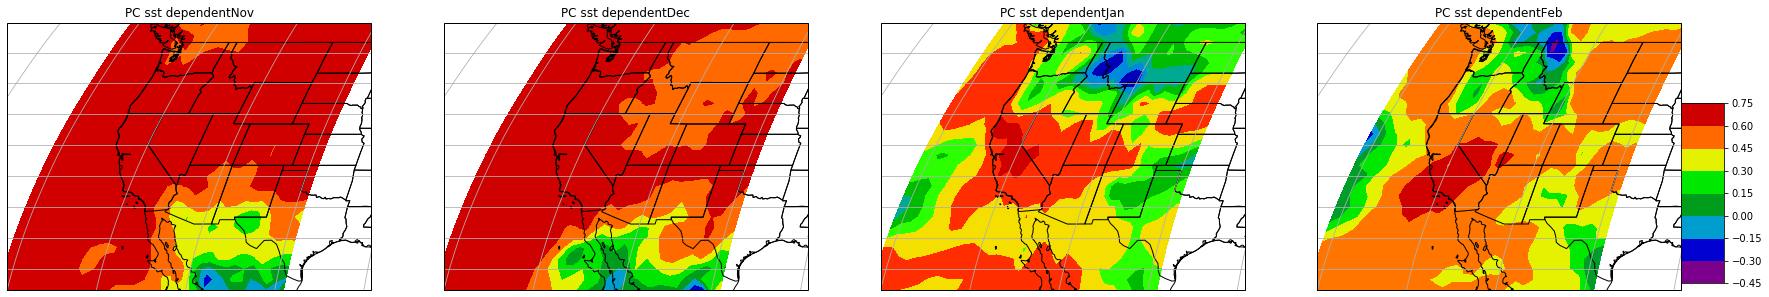

In [373]:
month=["Nov","Dec","Jan","Feb"]
monthnum=[10,11,1,2]
fig, (ax1, ax2,ax3,ax4) = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(30,5))
for i,j in enumerate([ax1,ax2,ax3,ax4]):
    pmonth=pforcast_adjtime.sel(T=pforcast_adjtime["T.month"]==monthnum[i])
    rainanom=pmonth - pmonth.mean('T')
    wmonth=wforcast_adjtime.sel(T=wforcast_adjtime["T.month"]==monthnum[i])
    sstmonth=sstforcast_adjtime.sel(T=wforcast_adjtime["T.month"]==monthnum[i])
    windanom=wmonth-wmonth.mean("T")
    windanom=windanom.mean("P")
    plot=partialcorr(sstmonth.ts,windanom.ua,rainanom.pr,1,(28,33),np.shape(windanom.ua)[0])
    plotmap(plot,"PC sst dependent"+month[i],resolution="one",ax=j,colorbar="nonauto")
cbar=fig.add_axes([.9, 0.15, 0.02, 0.5])
fig.colorbar(cb,cax=cbar)


Partial correlation:

corr(E(A_wind*x=b_sst,A_precip*x=b_sst)) 
Correlation when you are regressing for a common b 
SO when wind is the dependent variable, we have a negative correlation in error, so as one error goes up the other goes down. Perhaps precips error goes down as sst's error goes down
When Sst is the dependent variable, there is a high positive correlation throughout the state, which means that wind and precipiatiion do a similarly good job prediciting. 
